In [1]:
import numpy as np
import time
import matplotlib.pyplot
%matplotlib inline

In [2]:
mnist_train_x = "D:/ML/NN/MNIST-Neural-Network-Implementation/t10k-images-idx3-ubyte"
mnist_train_y = "D:/ML/NN/MNIST-Neural-Network-Implementation/t10k-labels-idx1-ubyte"
mnist_test_x = "D:/ML/NN/MNIST-Neural-Network-Implementation/train-images-idx3-ubyte"
mnist_test_y = "D:/ML/NN/MNIST-Neural-Network-Implementation/train-labels-idx1-ubyte"


In [3]:
def convert(imgs, labels, outs, n):
    with open(imgs,"rb") as imgf, open(labels,"rb") as labelf, open(outs,"w") as csvf:
        imgf.read(16)
        labelf.read(8)
        
        images = []
        
        for i in range(n):
            label_byte = labelf.read(1)
            label = ord(label_byte)
            image = [label]
            
            for j in range(28*28):
                img_byte = imgf.read(1)
                pixel = ord(img_byte)
                image.append(pixel)
            images.append(image)
    
        for image in images:
            csvf.write(",".join(map(str, image)) + "\n")

In [4]:
convert(mnist_test_x,mnist_test_y,"D:/ML/NN/MNIST-Neural-Network-Implementation/train.csv",60000)
convert(mnist_train_x,mnist_train_y,"D:/ML/NN/MNIST-Neural-Network-Implementation/test.csv",10000)

In [5]:
train_file=open("D:/ML/NN/MNIST-Neural-Network-Implementation/train.csv","r")
train_list=train_file.readlines()
train_file.close()
print(len(train_list))
train_list[404]

60000


'2,0,0,0,0,0,1,0,0,0,0,3,168,181,156,162,218,86,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,15,36,47,49,82,149,183,173,167,40,47,43,25,2,0,0,0,0,0,0,0,0,0,0,0,0,36,54,60,48,43,37,20,7,23,12,1,31,43,46,57,68,49,1,0,0,0,0,0,0,0,0,1,54,53,41,47,42,43,50,46,46,36,38,43,45,48,42,47,50,59,56,2,0,0,0,0,0,0,0,26,69,38,56,51,45,46,47,43,43,46,45,43,42,42,41,50,43,32,53,37,0,0,0,0,0,0,0,52,94,61,50,52,46,46,49,46,46,46,43,43,41,46,43,45,39,49,69,60,0,0,0,0,0,0,0,67,72,131,65,57,49,48,48,45,46,47,47,46,46,43,41,45,47,80,90,62,3,0,0,0,0,0,0,76,54,115,132,65,50,48,52,49,47,50,49,47,46,43,45,53,57,91,67,72,9,0,0,0,0,0,2,75,72,68,172,81,62,62,69,67,62,56,56,57,51,52,47,50,64,82,70,81,13,0,0,0,0,0,8,79,74,64,149,111,53,65,69,69,69,59,61,69,63,67,48,39,98,71,71,86,24,0,0,0,0,0,14,80,67,70,148,127,48,63,67,67,61,60,59,63,65,69,43,38,104,78,72,84,30,0,0,0,0,0,17,83,72,80,158,150,40,65,68,65,62,63,62,60,65,72,47,37,78,83,79,82,36,0,0,0,0,0,20,85,76,100,153,137,53,68,67,63,69,64,63,67,60,72,61,34,73,89,79,85,36,0,

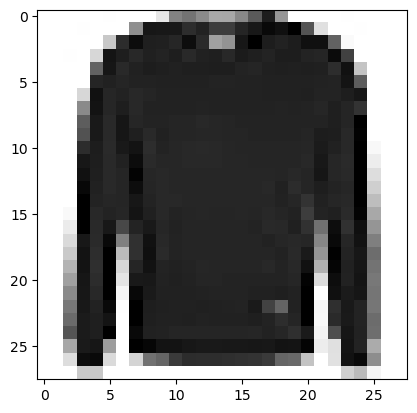

In [6]:
all_values = train_list[197].split(',')
image_array = np.asfarray(all_values[1:]).reshape((28,28))
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')

In [9]:
test_file=open("D:/ML/NN/MNIST-Neural-Network-Implementation/test.csv","r")
test_list=test_file.readlines()
test_file.close()
print(len(test_list))

10000


In [10]:
class NeuralNetwork:
    def __init__(self, model=[784, 128, 64, 10], epochs=15, learning_rate=0.1):
        self.model = model
        self.epochs = epochs
        self.learning_rate = learning_rate
        
        input_layer = model[0]
        hidden_1 = model[1]
        hidden_2 = model[2]
        output_layer = model[3]
        
        self.params = {
            'w1': np.random.randn(hidden_1, input_layer) * np.sqrt(1. / hidden_1),
            'w2': np.random.randn(hidden_2, hidden_1) * np.sqrt(1. / hidden_2),
            'w3': np.random.randn(output_layer, hidden_2) * np.sqrt(1. / output_layer)
        }
    
    def sigmoid(self, x, derivative=False):
        if derivative:
            return (np.exp(-x)) / ((np.exp(-x) + 1) ** 2)
        return 1 / (1 + np.exp(-x))
    
    def softmax(self, x, derivative=False):
        exps = np.exp(x - x.max())#potential overflow reduces
        if derivative:
            return exps / np.sum(exps, axis=0) * (1 - exps / np.sum(exps, axis=0))
        return exps / np.sum(exps, axis=0)
    
    def forward_prop(self, x_train):
        params = self.params
        params['A0'] = x_train
        
        params['Z1'] = np.dot(params['w1'], params['A0'])# x*w +b
        params['A1'] = self.sigmoid(params['Z1']) #activation function ulla anupividum
        
        params['Z2'] = np.dot(params['w2'], params['A1']) #output of first activation function * w +b
        params['A2'] = self.sigmoid(params['Z2']) #activation function 
        
        params['Z3'] = np.dot(params['w3'], params['A2'])#output of second activation function * w +b
        params['A3'] = self.softmax(params['Z3']) #output layer - calculated value
        
        return params['A3'] 
        
    def backward_prop(self, y_train, output):
        params = self.params
        change_w = {}
        
        error = 2 * (output - y_train) / output.shape[0] * self.softmax(params['Z3'], derivative=True)
        change_w['w3'] = np.outer(error, params['A2'])
        
        error = np.dot(params['w3'].T, error) * self.sigmoid(params['Z2'], derivative=True)
        change_w['w2'] = np.outer(error, params['A1'])
        
        error = np.dot(params['w2'].T, error) * self.sigmoid(params['Z1'], derivative=True)
        change_w['w1'] = np.outer(error, params['A0'])
        
        return change_w
    
    def update_weights(self, change_w):
        for key, val in change_w.items():
            self.params[key] -= self.learning_rate * val
            
    def accuracy(self, test_data):
        predictions = []
        for x in test_data:
            values = x.split(",")
            inputs = (np.asfarray(values[1:]) / 255.0 * 0.99) + 0.01
            targets = np.zeros(10) + 0.01
            targets[int(values[0])] = 0.99
            output = self.forward_prop(inputs)
            pred = np.argmax(output)
            predictions.append(pred == np.argmax(targets))
            
        return np.mean(predictions)
    
    def train(self, train_list, test_list):
        start_time = time.time()
        for i in range(self.epochs):
            for x in train_list:
                values = x.split(",")
                inputs = (np.asfarray(values[1:]) / 255.0 * 0.99) + 0.01
                targets = np.zeros(10) + 0.01
                targets[int(values[0])] = 0.99
                
                output = self.forward_prop(inputs)
                change_w = self.backward_prop(targets, output)
                self.update_weights(change_w)
                
            accuracy = self.accuracy(test_list)
            print('Epoch : {0}, Time Spent : {1:.02f}s, Accuracy : {2:.2f}%'.format(i + 1, time.time() - start_time, accuracy * 100))

In [12]:
dnn=NeuralNetwork(model=[784, 128, 64, 10], epochs=15, learning_rate=0.1)
dnn.train(train_list,test_list)

Epoch : 1, Time Spent : 97.08s, Accuracy : 76.78%
Epoch : 2, Time Spent : 191.67s, Accuracy : 81.29%
Epoch : 3, Time Spent : 289.75s, Accuracy : 81.97%
Epoch : 4, Time Spent : 476.94s, Accuracy : 82.61%
Epoch : 5, Time Spent : 572.38s, Accuracy : 83.24%
Epoch : 6, Time Spent : 666.36s, Accuracy : 83.70%
Epoch : 7, Time Spent : 789.44s, Accuracy : 83.90%
Epoch : 8, Time Spent : 912.54s, Accuracy : 84.04%
Epoch : 9, Time Spent : 1009.80s, Accuracy : 84.38%
Epoch : 10, Time Spent : 1111.10s, Accuracy : 84.51%
Epoch : 11, Time Spent : 1210.74s, Accuracy : 84.50%
Epoch : 12, Time Spent : 1311.71s, Accuracy : 84.76%
Epoch : 13, Time Spent : 1427.74s, Accuracy : 85.15%
Epoch : 14, Time Spent : 1540.02s, Accuracy : 85.36%
Epoch : 15, Time Spent : 1659.03s, Accuracy : 85.63%
